# Exploratory Data Analysis of the Raw Dataset
---

In [76]:
# Importing necessary libraries for exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing
---
In this section we will be reading a data from a json. Here will be using the dataset3.json file that may have contains raw derogatory tweets from twitter users.

In [77]:
# Import the raw data
df_raw = pd.read_json("../res/dataset3.json", orient='index')
df_raw.head()

,post_id,annotators,rationales,post_tokens
1179055004553900032_twitter,1179055004553900032_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],"[i, dont, think, im, getting, my, baby, them, ..."
1179063826874032128_twitter,1179063826874032128_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],"[we, cannot, continue, calling, ourselves, fem..."
1178793830532956161_twitter,1178793830532956161_twitter,"[{'label': 'normal', 'annotator_id': 4, 'targe...",[],"[nawt, yall, niggers, ignoring, me]"
1179088797964763136_twitter,1179088797964763136_twitter,"[{'label': 'hatespeech', 'annotator_id': 1, 't...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[<user>, i, am, bit, confused, coz, chinese, p..."
1179085312976445440_twitter,1179085312976445440_twitter,"[{'label': 'hatespeech', 'annotator_id': 4, 't...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[this, bitch, in, whataburger, eating, a, burg..."


## Dataset Characteristics
---
Here, we're going to check the characteristics of the dataset for us to have a better understanding of the dataset we are working on.

In [78]:
# Check the number of rows and columns
print("Number of rows in the dataset: ", df_raw.shape[0])
print("Number of columns in the dataset: ", df_raw.shape[1])

Number of rows in the dataset:  20148
Number of columns in the dataset:  4


In [79]:
# Count the number of null values in the dataset
df_raw.isnull().sum()

post_id        0
annotators     0
rationales     0
post_tokens    0
dtype: int64

In [80]:
# Check the data types of each column
df_raw.dtypes

post_id        object
annotators     object
rationales     object
post_tokens    object
dtype: object

## Data Statistics and Visualization
---
Here we get to know what are the data that we have in our dataset and the statistics 

### `annotators` column

In [81]:
# Check the structure of the 'annotators' column
df_raw['annotators'].head()

1179055004553900032_twitter    [{'label': 'normal', 'annotator_id': 1, 'targe...
1179063826874032128_twitter    [{'label': 'normal', 'annotator_id': 1, 'targe...
1178793830532956161_twitter    [{'label': 'normal', 'annotator_id': 4, 'targe...
1179088797964763136_twitter    [{'label': 'hatespeech', 'annotator_id': 1, 't...
1179085312976445440_twitter    [{'label': 'hatespeech', 'annotator_id': 4, 't...
Name: annotators, dtype: object

In [82]:
# Check the normalize structure of the annotators column
annot = pd.json_normalize(df_raw['annotators'])
annot.head()

,0,1,2
0,"{'label': 'normal', 'annotator_id': 1, 'target...","{'label': 'normal', 'annotator_id': 2, 'target...","{'label': 'normal', 'annotator_id': 3, 'target..."
1,"{'label': 'normal', 'annotator_id': 1, 'target...","{'label': 'normal', 'annotator_id': 2, 'target...","{'label': 'normal', 'annotator_id': 3, 'target..."
2,"{'label': 'normal', 'annotator_id': 4, 'target...","{'label': 'normal', 'annotator_id': 2, 'target...","{'label': 'hatespeech', 'annotator_id': 3, 'ta..."
3,"{'label': 'hatespeech', 'annotator_id': 1, 'ta...","{'label': 'offensive', 'annotator_id': 4, 'tar...","{'label': 'hatespeech', 'annotator_id': 3, 'ta..."
4,"{'label': 'hatespeech', 'annotator_id': 4, 'ta...","{'label': 'hatespeech', 'annotator_id': 2, 'ta...","{'label': 'offensive', 'annotator_id': 3, 'tar..."


In [83]:
# Map the keys and values of the annotators column and distribute the values in the array collections
label_collection = []
annot_id_collection = []
target_collection = []

for i in range(len(df_raw['annotators'])):
      for j in range(len(df_raw['annotators'][i])):
            label_collection.append(df_raw['annotators'][i][j]['label'])
            annot_id_collection.append(df_raw['annotators'][i][j]['annotator_id'])
            target_collection.append(df_raw['annotators'][i][j]['target'])

In [84]:
# Check the categories and their number of occurences in the 'label' attribute
label_stats = pd.Series(label_collection)
label_stats_explode = label_stats.explode().value_counts()
label_stats_pd = pd.DataFrame(label_stats_explode).swapaxes(axis1='index', axis2='columns')
label_stats_pd

,normal,hatespeech,offensive
0,24449,18070,17925


C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


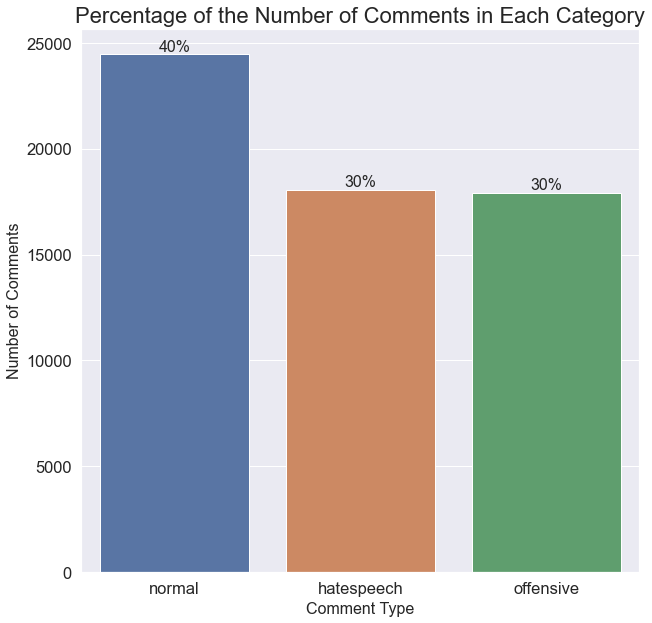

In [85]:
# Count the number of comments under each label.
categories = list(label_stats_pd.columns.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))

ax= sns.barplot(categories, label_stats_pd.iloc[:,:].sum().values)
plt.title("Percentage of the Number of Comments in Each Category", fontsize=22)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=16)
# #adding the text labels
rects = ax.patches
labels = label_stats_pd.iloc[:,:].sum().values
total = sum(labels)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    percent = round((label/total)*100)
    ax.text(rect.get_x() + rect.get_width()/2, height, str(percent) + '%', ha='center', va='bottom', fontsize=16)
plt.show()

In [86]:
# Check the categories and their number of occurences in the 'annotator_id' attribute
annot_id_stats = pd.Series(annot_id_collection)
annot_id_stats_explode = annot_id_stats.explode().value_counts().sort_index()
annot_id_pd = pd.DataFrame(annot_id_stats.explode().value_counts().sort_index())
annot_id_pd_swapped = pd.DataFrame(annot_id_stats.explode().value_counts().sort_index()).swapaxes(axis1='index', axis2='columns')

categories = list(annot_id_pd_swapped.columns.values)
values = list(annot_id_pd[0])

cat_val_df = pd.DataFrame({'annotator_id': categories, 'count': values})
cat_val_df.head()

,annotator_id,count
0,1,1748
1,2,288
2,3,1358
3,4,5730
4,5,209


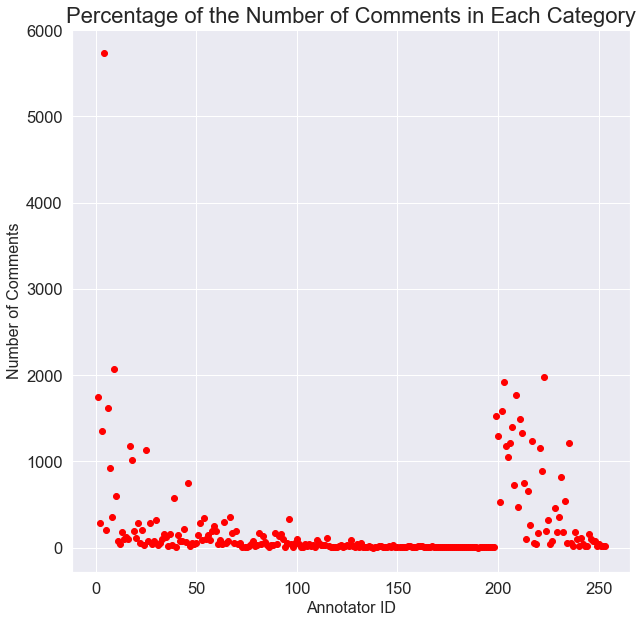

In [87]:
# Visualize the data in 'annotator_id' attribute in a scatter plot

plt.figure(figsize=(10,10))
plt.title("Percentage of the Number of Comments in Each Category", fontsize=22)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Annotator ID', fontsize=16)
plt.scatter(cat_val_df['annotator_id'], cat_val_df['count'], color = 'red')

In [88]:
# Check the categories and their number of occurences in the 'target' attribute
target_stats = pd.Series(target_collection)
target_stats.explode().value_counts()
target_stats_df = pd.DataFrame(target_stats.explode().value_counts())
target_stats_df_swapped = pd.DataFrame(target_stats.explode().value_counts()).swapaxes(axis1='index', axis2='columns')
target_stats_df_swapped

,None,African,Islam,Women,Jewish,Homosexual,Other,Refugee,Arab,Caucasian,...,Minority,Heterosexual,Economic,Hindu,Nonreligious,Indigenous,Indian,Buddhism,Bisexual,Asexual
0,21314,10015,6686,6126,5961,5617,4708,3100,2907,2359,...,188,141,90,89,87,83,81,12,8,5


C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


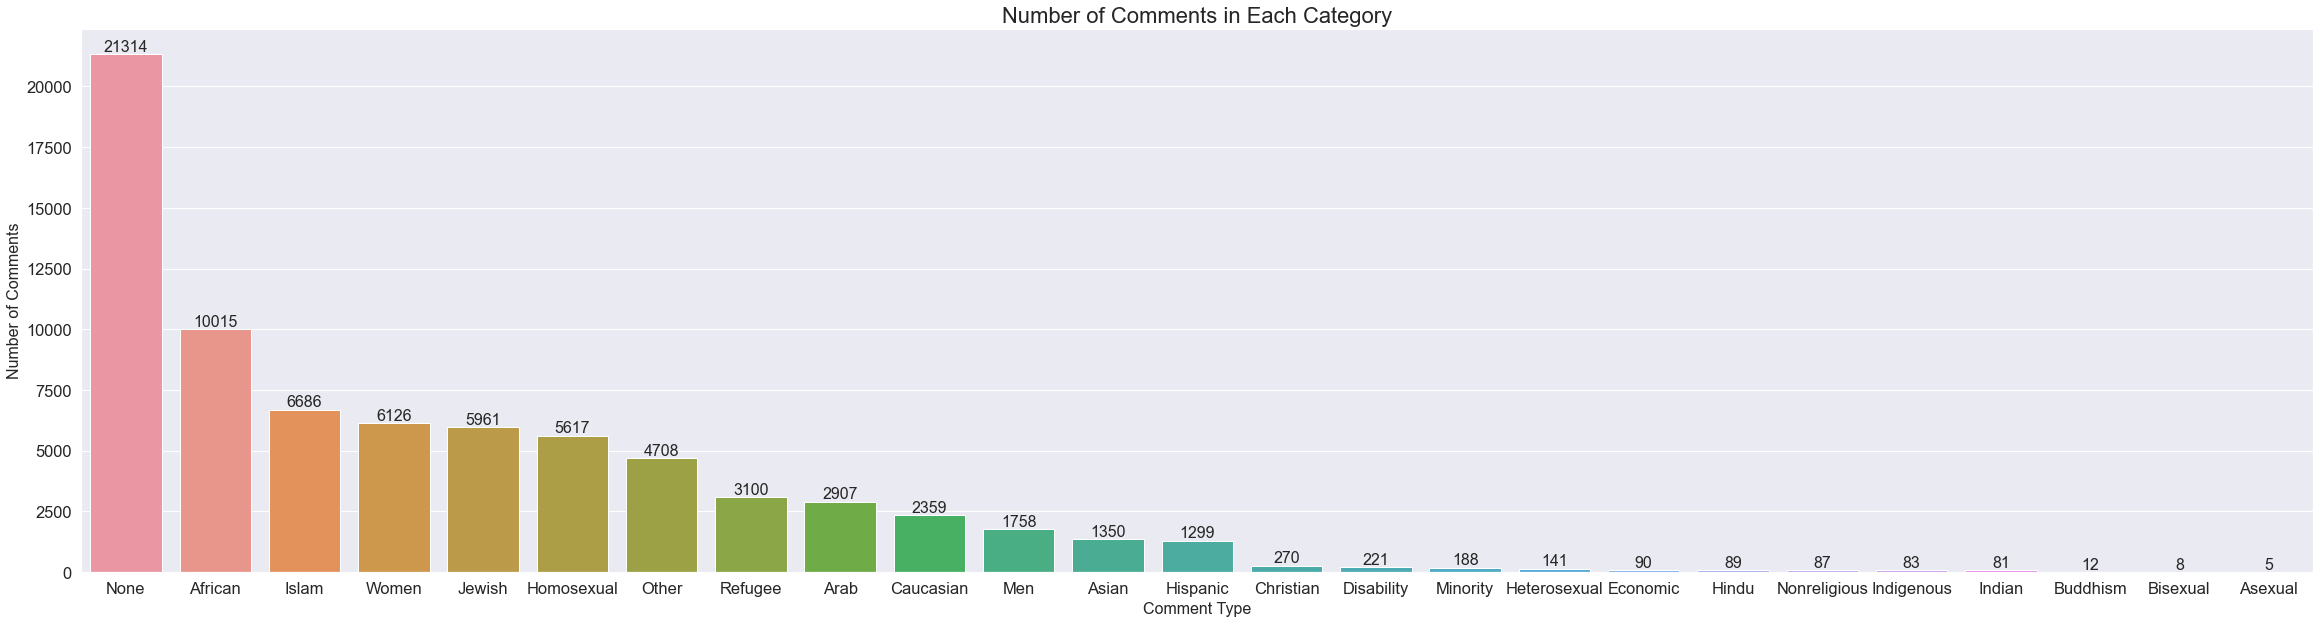

In [89]:
# Count the number of comments under each label.
categories = list(target_stats_df_swapped.columns.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(40,10))

ax= sns.barplot(categories, target_stats_df_swapped.iloc[:,:].sum().values)
plt.title("Number of Comments in Each Category", fontsize=22)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=16)
# #adding the text labels
rects = ax.patches
labels = target_stats_df_swapped.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


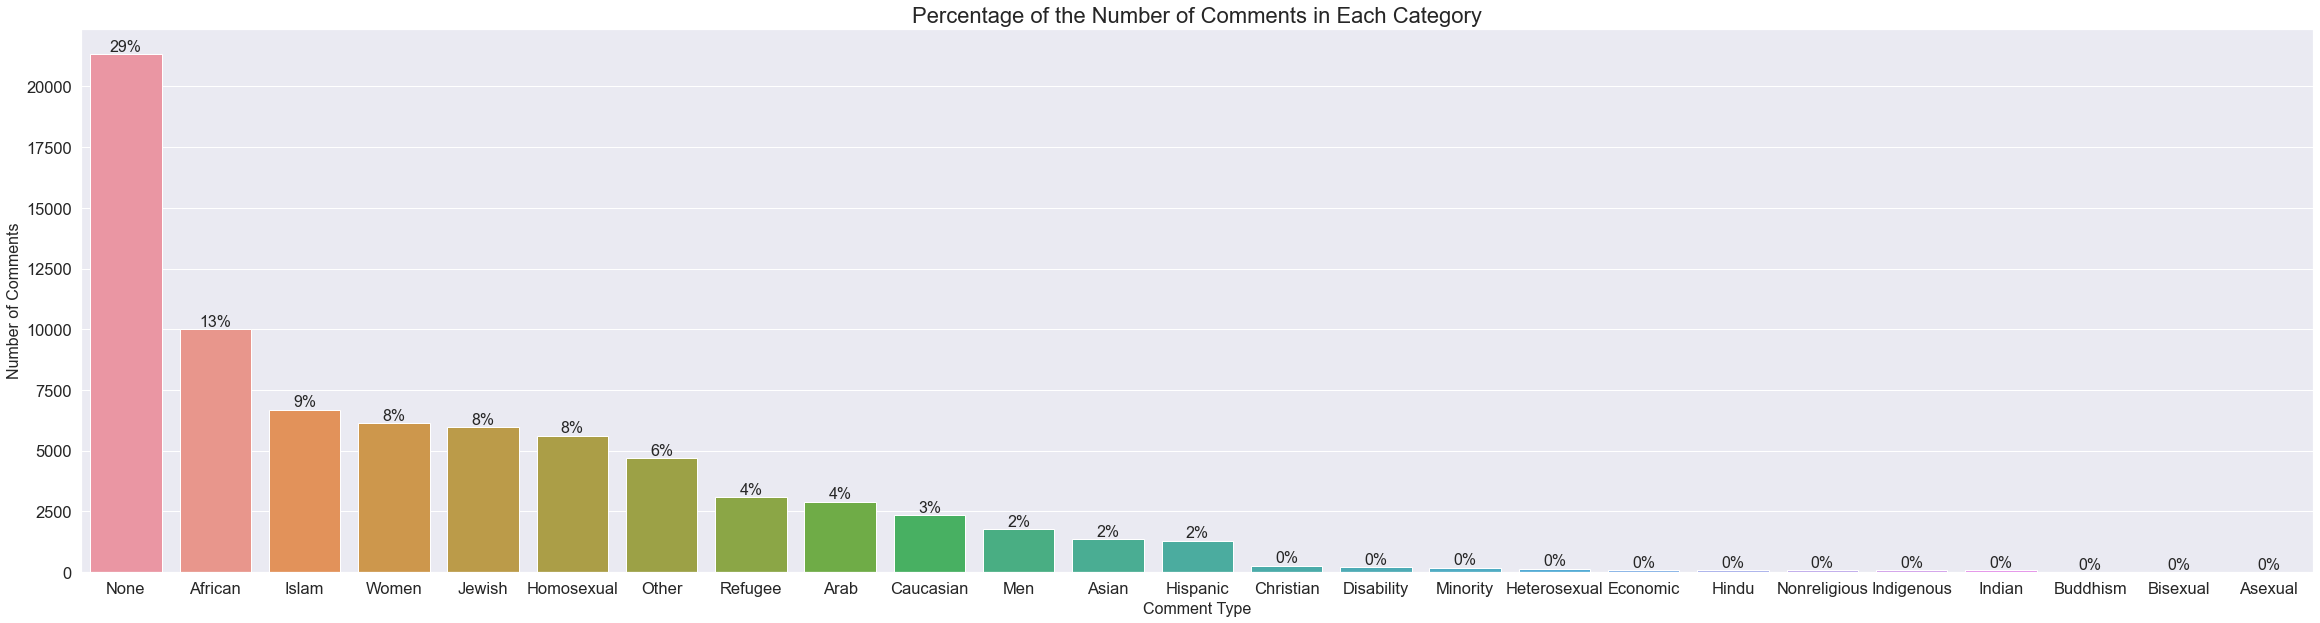

In [90]:
# Percentage of the number of comments under each label.
categories = list(target_stats_df_swapped.columns.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(40,10))

ax= sns.barplot(categories, target_stats_df_swapped.iloc[:,:].sum().values)
plt.title("Percentage of the Number of Comments in Each Category", fontsize=22)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=16)
# #adding the text labels
rects = ax.patches
labels = target_stats_df_swapped.iloc[:,:].sum().values
total = sum(labels)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    percent = round((label/total)*100)
    ax.text(rect.get_x() + rect.get_width()/2, height, str(percent) + '%', ha='center', va='bottom', fontsize=16)
plt.show()


### `rationales` column

In [91]:
# Count the number of rows with empty and non-empty rationales
empty_rationales_sum = len([array for key, array in df_raw['rationales'].items() if array])
no_rationales_sum = len([array for key, array in df_raw['rationales'].items() if not array])
print("Number of rows with rationales:", empty_rationales_sum)
print("Number of rows without rationales:", no_rationales_sum)

Number of rows with rationales: 11415
Number of rows without rationales: 8733


### `post_tokens` column

In [92]:
# Count the number of non-alphanumeric characters in the 'post_tokens' columns

non_alphabet_count = 0;
for data in df_raw['post_tokens']:
    for d in data:
        if not d.isalpha() and not d.isdigit():
            non_alphabet_count += 1

print("Number of non-alphanumeric characters present in the post_tokens column: ", non_alphabet_count)


Number of non-alphanumeric characters present in the post_tokens column:  16738
